##  Best location for new restaurant in Bangalore, India
### IBM Data Science – Capstone Project
By Cebe Chakaravarthi, January 25, 2020

### Introduction/Business Problem:

Bangalore is one of the third most populous and fastest-growing cities in India.  This city has been known as the silicon city for years now, as it is the hub for IT Companies in the country. This fact has attracted over 5 million people to work and live in the city. Currently, the city is called the Startup capital of India. This fact attracts young talents from across the country, resulting in rapid urbanization and an environment that fosters business. As people find better jobs and better business opportunities, people are more willing to spend their money. Thus new business in Bangalore finds a better chance of success. 
This scenario makes Bangalore the best choice to start a restaurant. However, there are many localities in Bangalore which are already saturated and which are in the phase of development. This objective of the study is to analyze and find the best locality in Bangalore to start a new restaurant. This study will be of help to entrepreneurs who are planning to start a restaurant or allied business and to the managers of restaurant chains to prepare for their next branch.  


### Data Description:
List of data required:
•	List of localities in Bangalore with their coordinates
•	List of venues and venue categories in the localities with their coordinates
•	Current developments in the city of Bangalore

For this study, first, the localities of Bangalore has to be listed along with their coordinates. The list of localities are available in Wikipedia page ‘https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Bangalore’ 
We make use of ‘BeauifulSoup’ package to scrape the web page and arrive at a table with the localities. Then we use the ‘Geolocator’ library to obtain the latitude and longitude of the localities and add these data to the data frame. We then visualize the localities using ‘folium’ maps and discard any coordinates that lie far away from the city limits. 
With the localities and their coordinates available, we make use of ‘FourSquare’ to obtain the nearby venues and venue categories in the localities. We then filter out and count the restaurant and other food joints in the localities into a data frame and find the localities with least restaurants. 
We then compare the localities with the current developments happening in and around Bangalore to arrive at the best place to start a restaurant.


### Step 1: Importing necessary python libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


print("Libraries imported.")

Libraries imported.


### Step 2: Scrapping the Wikipedia web page for localities in Bangalore using BeauifulSoup 

In [2]:
data = requests.get("https://en.wikipedia.org/wiki/Category:Neighbourhoods_in_Bangalore").text
soup = BeautifulSoup(data, 'html.parser')
neighborhoodList = []

In [3]:
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text)

### Creating a dataframe with the list of localities

In [4]:
Areas = pd.DataFrame({"Neighborhood": neighborhoodList})
Areas = Areas.drop([0,1,2], axis=0)
Areas = Areas.reset_index()
Areas = Areas.drop(columns="index")
Areas1 = Areas.reset_index()

### Cleaning: Dropping localities that does not have coordinates in geolocator

In [5]:

Areas2 = Areas1.drop([2,6,8,20,21,22,23,24,25,27,35,40,56,59,60,80,85,86,99,108,109,110,115,128], axis=0) 

### Finding the coordinates for the localtities and appending the latitude and longitude to the  dataframe

In [6]:
geolocator = Nominatim(user_agent="myGeocoder")
list_lat = []
list_long = []

for Neighborhood in Areas2["Neighborhood"]:
    location = geolocator.geocode(Neighborhood, timeout=10)
    latitude = location.latitude
    longitude = location.longitude
    list_lat.append([latitude])
    list_long.append([longitude])
    #print(latitude, longitude)
df_lat = pd.DataFrame(list_lat, columns = ['Latitude'])
df_long = pd.DataFrame(list_long, columns = ['Longitude'])

### Step 3: Cleaning: Confining the localities within the city limits
For confining the localities, we take in localities only within the lattitudes 11.5 and 13.
 
Futher through map visualization, we manually discard few out lying localities such as Horamavu, Anjapura and Girinagar.

In [7]:
Areas3 = pd.concat([Areas2, df_lat, df_long], axis=1)

#refining the data

Areas4=Areas3.dropna()
indexnames1 = Areas4[ (Areas4['Latitude'] >= 13)].index
indexnames2 = Areas4[ (Areas4['Latitude'] <= 11.5)].index
Areas4.drop(indexnames1, inplace=True)
Areas4.drop(indexnames2, inplace=True)
Areas4.drop(Areas4.loc[Areas4['Neighborhood']=="Horamavu"].index, inplace=True)
Areas4.drop(Areas4.loc[Areas4['Neighborhood']=="Anjanapura"].index, inplace=True)
Areas4.drop(Areas4.loc[Areas4['Neighborhood']=="Girinagar"].index, inplace=True)
Areas4.drop(Areas4.loc[Areas4['Neighborhood']=="Agara, Bangalore"].index, inplace=True)
Areas5 = Areas4.reset_index()
Areas5

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,level_0,index,Neighborhood,Latitude,Longitude
0,0,0.0,Adugodi,12.942847,77.610416
1,4,4.0,Arekere,12.961274,77.615294
2,9,9.0,Banashankari,12.986475,77.538571
3,10,10.0,Banaswadi,12.936439,77.666984
4,11,11.0,Basavanagudi,12.978571,77.477858
5,12,12.0,Basaveshwaranagar,12.899593,77.610317
6,13,13.0,Bellandur,12.908945,77.623904
7,14,14.0,Bharathnagar,12.816244,77.691611
8,16,16.0,Bommanahalli,12.915177,77.610282
9,26,26.0,Cooke Town,12.977153,77.578401


### Step 4: Visualizing the localities as Map

In [8]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.0.1               |             py_0         575 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

In [9]:
map_blr = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(Areas5['Latitude'], Areas5['Longitude'], Areas5['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_blr)  
    
map_blr

### Step 5: Obtaining Venues and VenueCategory in the localities with a radius of 3km

In [10]:
CLIENT_ID = 'QEF4SFROUUVOQKNPAFNNRDUW4ACAWSYYG312LM3BKEDDKPIZ' 
CLIENT_SECRET = 'CCBFW1WDVTUYDLPFX3SR0QBB5R2UKRYOZ3F1JDJ3PLQMPDRM'
VERSION = '20180604'

In [11]:
radius = 3000
LIMIT = 500

venues = []

for lat, long, neighborhood in zip(Areas5['Latitude'], Areas5['Longitude'], Areas5['Neighborhood']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

### Appending the venue data to the dataframe

In [12]:
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(3379, 7)


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Adugodi,12.942847,77.610416,PVR IMAX,12.934595,77.611321,Movie Theater
1,Adugodi,12.942847,77.610416,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
2,Adugodi,12.942847,77.610416,Dyu Art Cafe,12.937289,77.617591,Financial or Legal Service
3,Adugodi,12.942847,77.610416,Zingron - Naga Kitchen,12.936271,77.615051,Indian Restaurant
4,Adugodi,12.942847,77.610416,Tommy Hilfiger,12.934552,77.611347,Clothing Store


### Exploring the venue data 
Such as 
Finding the count of venues

Viewing & finding the count of various venue category

Finding the frequency of venues in a localities

Ranking the most common venues in each localities

In [13]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Neighborhood,,,,,,
Adugodi,100,100,100,100,100,100
Arekere,100,100,100,100,100,100
Banashankari,47,47,47,47,47,47
Banaswadi,100,100,100,100,100,100
Basavanagudi,4,4,4,4,4,4
Basaveshwaranagar,98,98,98,98,98,98
Bellandur,100,100,100,100,100,100
Bharathnagar,14,14,14,14,14,14
Bommanahalli,100,100,100,100,100,100


In [14]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 183 uniques categories.


In [15]:
venues_df['VenueCategory'].unique()[:154]

array(['Movie Theater', 'Burger Joint', 'Financial or Legal Service',
       'Indian Restaurant', 'Clothing Store', 'Multiplex',
       'Breakfast Spot', 'Brewery', 'Lounge', 'Bar', 'Creperie',
       'Mobile Phone Shop', 'Dessert Shop', 'Tea Room', 'Shopping Mall',
       'Coffee Shop', 'Café', 'Italian Restaurant',
       'Fast Food Restaurant', 'Juice Bar', 'Donut Shop', 'Yoga Studio',
       'Ice Cream Shop', 'Chinese Restaurant', 'Bookstore',
       'Indian Sweet Shop', 'Smoke Shop', 'Arcade', 'Bakery',
       'Andhra Restaurant', 'Candy Store', 'Pub', 'Gym', 'Cocktail Bar',
       'Toy / Game Store', 'Thai Restaurant', 'Furniture / Home Store',
       'Pizza Place', 'Sushi Restaurant', 'Hotel', 'Asian Restaurant',
       'Botanical Garden', 'Boutique', 'Soccer Stadium',
       'Middle Eastern Restaurant', 'Bed & Breakfast', 'Bistro',
       'Seafood Restaurant', 'Gym / Fitness Center', 'Korean Restaurant',
       'Park', 'Mediterranean Restaurant', 'Indie Movie Theater',
       '

In [16]:
blr_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
blr_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [blr_onehot.columns[-1]] + list(blr_onehot.columns[:-1])
blr_onehot = blr_onehot[fixed_columns]

print(blr_onehot.shape)
blr_onehot.head()

(3379, 184)


,Neighborhoods,ATM,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Candy Store,Capitol Building,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Outlet Store,Pakistani Restaurant,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Print Shop,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tech Startup,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Booth,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Adugodi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [17]:
blr_grouped = blr_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(blr_grouped.shape)

blr_grouped.head()


(43, 184)


,Neighborhoods,ATM,Afghan Restaurant,Airport,Airport Terminal,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Badminton Court,Bakery,Bar,Bed & Breakfast,Beer Garden,Bengali Restaurant,Bistro,Boarding House,Bookstore,Botanical Garden,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Candy Store,Capitol Building,Chaat Place,Chettinad Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,General Entertainment,German Restaurant,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,History Museum,Hockey Arena,Hookah Bar,Hotel,Hotel Bar,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Kids Store,Korean Restaurant,Lake,Light Rail Station,Liquor Store,Lounge,Maharashtrian Restaurant,Market,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motorcycle Shop,Movie Theater,Multicuisine Indian Restaurant,Multiplex,Music Venue,Neighborhood,Nightclub,Noodle House,North Indian Restaurant,Office,Outlet Store,Pakistani Restaurant,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pizza Place,Platform,Playground,Plaza,Print Shop,Pub,Punjabi Restaurant,Racetrack,Rajasthani Restaurant,Recreation Center,Resort,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Seafood Restaurant,Shop & Service,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,South Indian Restaurant,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Szechuan Restaurant,Tea Room,Tech Startup,Tex-Mex Restaurant,Thai Restaurant,Theater,Toll Booth,Toy / Game Store,Trail,Train Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Adugodi,0.0,0.00,0.0,0.0,0.00,0.01,0.01,0.0,0.0,0.010000,0.01,0.0,0.01,0.0,0.030000,0.01,0.01,0.0,0.0,0.01,0.0,0.02,0.01,0.01,0.0,0.02,0.02,0.00,0.01,0.0,0.000000,0.0,0.0,0.0,0.0,0.070000,0.01,0.0,0.0,0.0,0.020000,0.0,0.02,0.01,0.020000,0.0,0.0,0.0,0.0,0.01,0.00,0.01,0.0,0.00,0.000000,0.01,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.0,0.00,0.01000,0.01,0.0,0.0,0.00,0.000000,0.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.020000,0.01,0.000000,0.00,0.01,0.0,0.030000,0.00,0.00,0.020000,0.0,0.100000,0.01,0.010000,0.0,0.02,0.00,0.0,0.02,0.0,0.0,0.00,0.0,0.01,0.00,0.0,0.000000,0.04,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.01,0.000000,0.01,0.0,0.0,0.0,0.01,0.0,0.010000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.020000,0.0,0.0,0.00,0.010000,0.0,0.0,0.00,0.0,0.02,0.0,0.0,0.0,0.00,0.0,0.01,0.0,0.0,0.00,0.010000,0.01,0.01,0.01,0.01,0.00,0.01,0.0,0.0,0.0,0.00,0.00,0.0,0.02,0.0,0.02,0.0,0.0,0.01,0.0,0.0,0.02,0.0,0.0,0.0,0.02000,0.0,0.0,0.0,0.00,0.01
1,Arekere,0.0,0.01,0.0,0.0,0.01,0.01,0.01,0.0,0.0,0.020000,0.01,0.0,0.01,0.0,0.000000,0.02,0.01,0.0,0.0,0.00,0.0,0.01,0.00,0.00,0.0,0.02,0.04,0.01,0.02,0.0,0.000000,0.0,0.0,0.0,0.0,0.040000,0.00,0.0,0.0,0.0,0.010000,0.0,0.02,0.02,0.020000,0.0,0.0,0.0,0.0,0.00,0.01,0.01,0.0,0.01,0.010000,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.00,0.00000,0.01,0.0,0.0,0.00,0.000000,0.01,0.01,0.01,0.01,0.0,0.0,0.00,0.0,0.0,0.0,0.01000

In [18]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [19]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = blr_grouped['Neighborhood']

for ind in np.arange(blr_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(blr_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0.0,Indian Restaurant,Café,Lounge,Bakery,Hotel,Gym,Coffee Shop,Chinese Restaurant,Donut Shop,Sushi Restaurant
1,0.0,Hotel,Indian Restaurant,Ice Cream Shop,Brewery,Pub,Lounge,Café,Shopping Mall,Tea Room,Burger Joint
2,0.0,Indian Restaurant,Bakery,Café,Ice Cream Shop,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Park,Bus Line,Seafood Restaurant,Miscellaneous Shop
3,0.0,Café,Pizza Place,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Lounge,Hotel,Sandwich Place,Tea Room,Gym
4,0.0,Pharmacy,Indian Restaurant,Market,Restaurant,Dim Sum Restaurant,Falafel Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop


### Step 6: Filtering out all the venues of each localities that are related to Restaurant

In [20]:
restaurant_df = venues_df[venues_df['VenueCategory'].str.contains("Restaurant") | 
                          venues_df['VenueCategory'].str.contains("BBQ") | 
                          venues_df['VenueCategory'].str.contains("Cafe") | 
                          venues_df['VenueCategory'].str.contains("Food") | 
                          venues_df['VenueCategory'].str.contains("Bakery") |
                          venues_df['VenueCategory'].str.contains("Cream") |
                          venues_df['VenueCategory'].str.contains("Bakery") |
                          venues_df['VenueCategory'].str.contains("Burger") |
                          venues_df['VenueCategory'].str.contains("Breakfast") |
                          venues_df['VenueCategory'].str.contains("Juice") |
                          venues_df['VenueCategory'].str.contains("Pizza") |
                          venues_df['VenueCategory'].str.contains("Diner") 
                            ] 
restaurant_df.tail()


,Neighborhood,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
3374,Sanjaynagar,12.897971,77.570085,Cable Car,12.916951,77.585489,Italian Restaurant
3375,Sanjaynagar,12.897971,77.570085,Pier 39,12.916972,77.585440,Mexican Restaurant
3376,Sanjaynagar,12.897971,77.570085,Kakori Grill House,12.901745,77.585834,Indian Restaurant
3377,Sanjaynagar,12.897971,77.570085,Roll N Rock,12.907759,77.563943,Fast Food Restaurant
3378,Sanjaynagar,12.897971,77.570085,Pizza Stop,12.905550,77.595059,Pizza Place


In [21]:
restaurant_df.shape

(1721, 7)

### Step 7: Counting the number of Restaurants in each locality and visualizing the resultant data

In [22]:
restaurant_df['Restaurant Count'] = 1
restaurant_df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(1721, 8)

In [26]:
restaurant_df2 = restaurant_df.groupby(['Neighborhood'],as_index=False).agg({'Restaurant Count': 'sum'})
restaurant_df3 = restaurant_df2.sort_values(['Restaurant Count'], ascending=[True])
restaurant_df3.head(10)

,Neighborhood,Restaurant Count
17,Hebbal,2
4,Basavanagudi,2
20,Indiranagar,5
7,Bharathnagar,6
18,Hoodi,15
31,Mahalakshmi Layout,17
11,Dollars Colony,18
37,"Rajarajeshwari Nagar, Bangalore",21
14,"Gandhi Nagar, Bangalore",29
28,Koramangala,30


In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 43 artists>

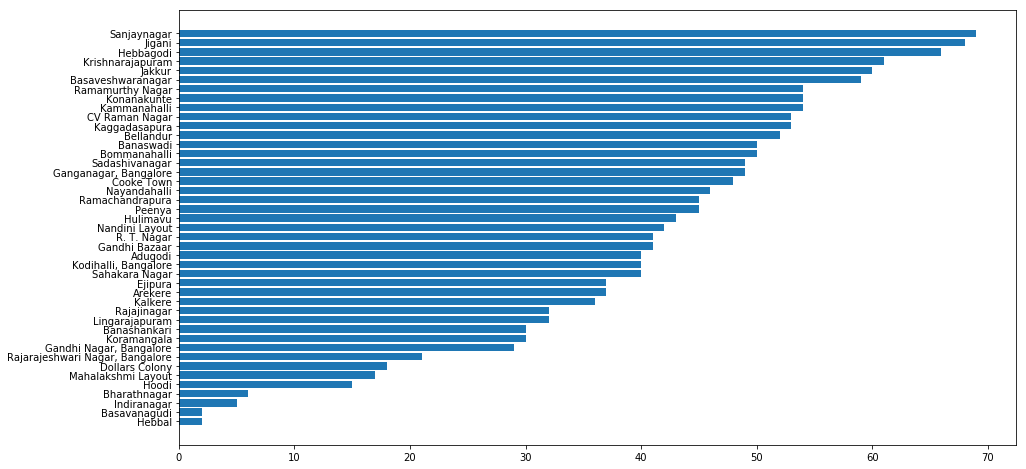

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(restaurant_df3['Neighborhood'], restaurant_df3['Restaurant Count'])

### Obseravtions
It can be seen that localities such as Hebbal, Basavanagudi, Indiranagar & Bharathnagar have very low number of restaurants compared to the rest of the localities.
Analyzing the current developments in the city such as metro stations, airport or IT park will lead us to the most desired location to set up a new restaurant. 